In [16]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pytesseract
import imutils
import os

In [100]:
def show(img, figsize=(10, 10), title=None):
    """A helper function to show images.
        img: image as NumPy nd array.
        figsize: figure size
    """
    fig = plt.figure(figsize=figsize)
    plt.imshow(img)
    if title is not None:
        plt.title(title)
    plt.show()

Image File Name: acrylic-number-plate.jpg


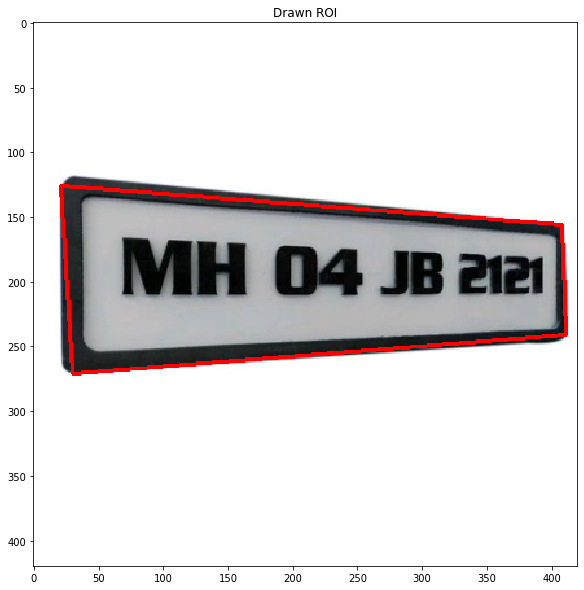

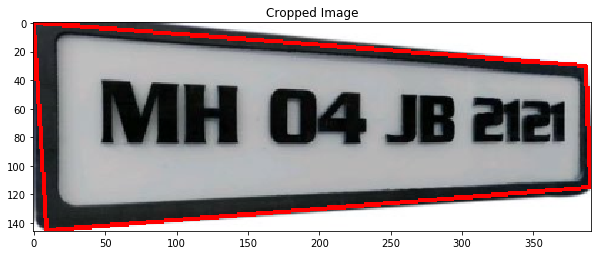

Detected Text:  Nothing Detected
----------------------------------------------------------------------
Image File Name: car.jpeg


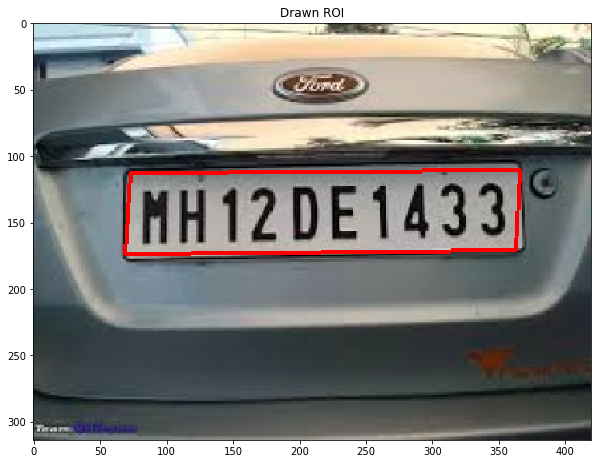

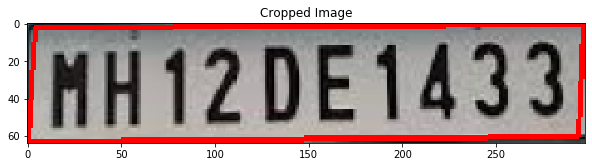

Detected Text:  MH1ZDE1433
----------------------------------------------------------------------
Image File Name: Car_Image_1.jpg


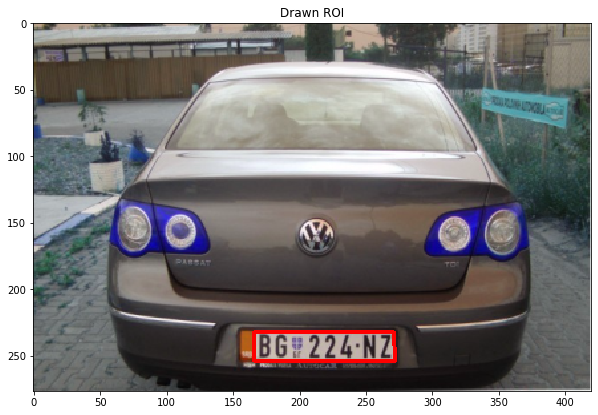

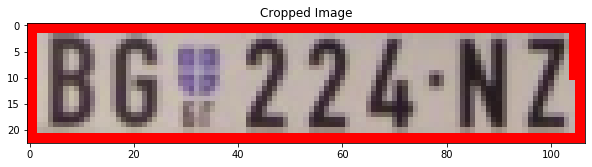

Detected Text:  BGY224-NZ
----------------------------------------------------------------------
Image File Name: download.jpg


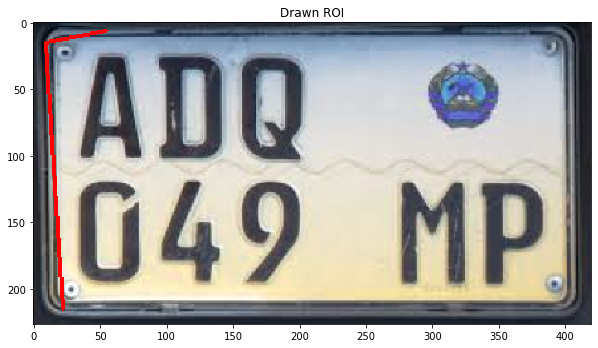

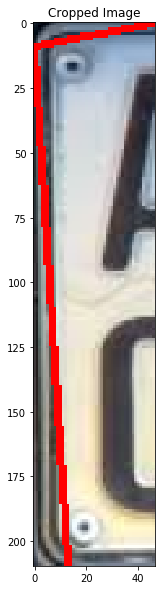

Detected Text:  Nothing Detected
----------------------------------------------------------------------
Image File Name: main-qimg-125a65253f383b7209f33bc455463807.jpg


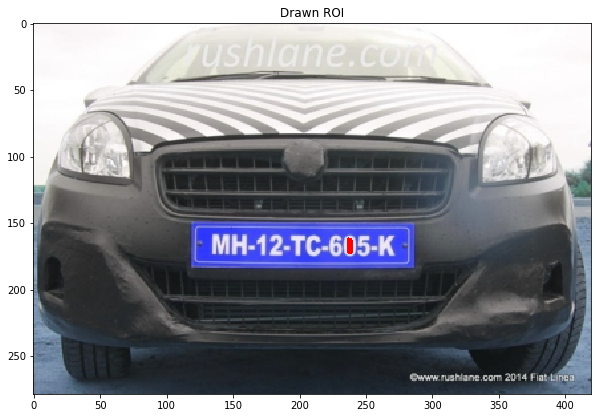

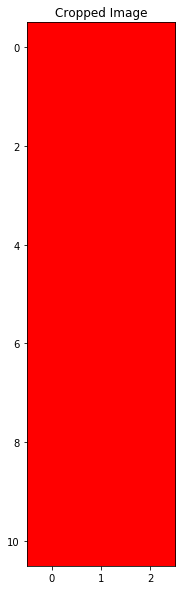

Detected Text:  Nothing Detected
----------------------------------------------------------------------
Image File Name: maxresdefault.jpg


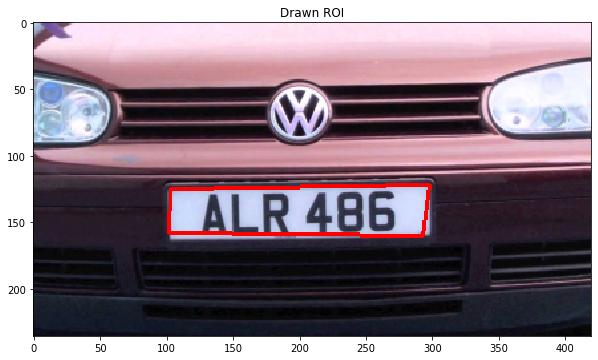

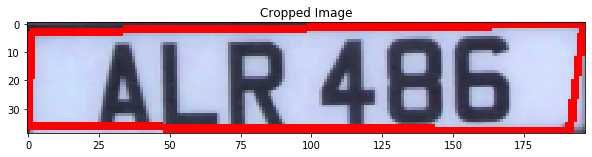

Detected Text:  ALR 486
----------------------------------------------------------------------
Image File Name: number_plate.jpg
Error Detecting.


In [111]:
def detect(img_path):
    """A method to perform detection of Number plate using Tesseract and OpenCV.
        imag_path: Image path.
    
    """
    img = cv2.imread(img_path)
    oimg = imutils.resize(img, width=420)
    gimg = cv2.cvtColor(oimg, cv2.COLOR_BGR2GRAY)

    # apply bilateral filter to remove maximum noises
    gimg = cv2.bilateralFilter(gimg, 15, 35, 35)
    
    # apply canny edge detector to find possible number plate ROI
    cimg = cv2.Canny(gimg, 150, 250)

    # find contours using edge detected image
    (cnts, _) = cv2.findContours(cimg.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    cnts=sorted(cnts, key = cv2.contourArea, reverse = True)[:50] 
    number_plate_cnts = None 

    count = 0
    for c in cnts:
            peri = cv2.arcLength(c, True)
            approx = cv2.approxPolyDP(c, 0.02 * peri, True)
            if len(approx) == 4:  
                number_plate_cnts = approx 
                break

    # Masking the part other than the number plate
    mask = np.zeros(gimg.shape,np.uint8)
    new_image = cv2.drawContours(mask,[number_plate_cnts],0,255,-1)
    new_image = cv2.bitwise_and(oimg,oimg,mask=mask)
    
    draw_img = cv2.drawContours(oimg,[number_plate_cnts],0,255,2)
    #show(draw_img)
    
    x,y,w,h = cv2.boundingRect(number_plate_cnts)
    cropped = draw_img[y:y+h, x:x+w]    
    
    
    # Configuration for tesseract
    config = ('-l eng --oem 1 --psm 3')

    # Run tesseract OCR on image
    text = pytesseract.image_to_string(new_image, config=config)
    if len(text) == 0:
        text = "Nothing Detected"
    show(oimg, title="Drawn ROI")
    show(cropped, title="Cropped Image")
    print("Detected Text: ", text)
    print("----------------------------------------------------------------------")

root = "assets/"
for img in os.listdir(root):
    print(f"Image File Name: {img}")
    img = root+img
    try:
        detect(img)
    except:
        print("Error Detecting.")
        pass